## Predictive Customer Response Modeling for Vodafone Marketing Optimization

## Problem Statement

The objective of this project is to build a predictive model to identify which Vodafone customers are most likely to respond to marketing campaigns. Accurate predictions will enable the company to improve its targeting strategy, reduce marketing expenses, and boost campaign ROI. 

This modeling task is crucial for optimizing resource allocation and enhancing customer engagement through personalized outreach.



In [ ]:
import pandas as pd

# Load dataset
df = pd.read_csv("Telco Customer.csv")
df.info()
df.head()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [ ]:

df.info()
df.replace(" ", pd.NA, inplace=True)
df.isna().sum()



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7032 entries, 0 to 7031
Data columns (total 22 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7032 non-null   object 
 1   gender            7032 non-null   object 
 2   SeniorCitizen     7032 non-null   int64  
 3   Partner           7032 non-null   object 
 4   Dependents        7032 non-null   object 
 5   tenure            7032 non-null   int64  
 6   PhoneService      7032 non-null   object 
 7   MultipleLines     7032 non-null   object 
 8   InternetService   7032 non-null   object 
 9   OnlineSecurity    7032 non-null   object 
 10  OnlineBackup      7032 non-null   object 
 11  DeviceProtection  7032 non-null   object 
 12  TechSupport       7032 non-null   object 
 13  StreamingTV       7032 non-null   object 
 14  StreamingMovies   7032 non-null   object 
 15  Contract          7032 non-null   object 
 16  PaperlessBilling  7032 non-null   object 


customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
Churn_Encoded       0
dtype: int64

In [7]:
# Convert TotalCharges to numeric
df["TotalCharges"] = pd.to_numeric(df["TotalCharges"], errors='coerce')

# Drop rows with missing TotalCharges (very few)
df.dropna(subset=["TotalCharges"], inplace=True)

# Reset index
df.reset_index(drop=True, inplace=True)


C:\Users\harsh\AppData\Local\Temp\ipykernel_27552\2368480708.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='Churn', palette='Set2')


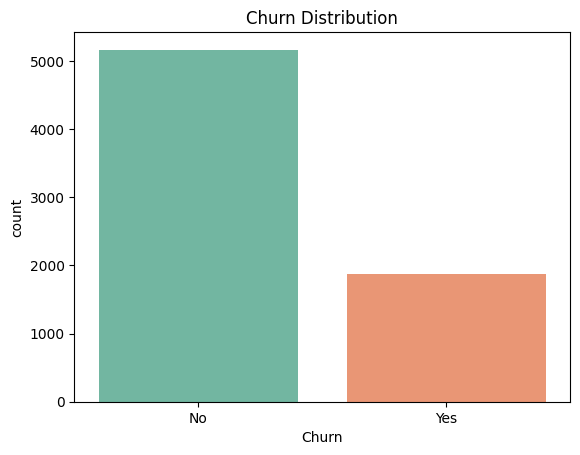

Churn Rate:
 Churn
No     73.421502
Yes    26.578498
Name: proportion, dtype: float64


In [8]:
import seaborn as sns
import matplotlib.pyplot as plt

# Churn count plot
sns.countplot(data=df, x='Churn', palette='Set2')
plt.title("Churn Distribution")
plt.show()

# Churn % 
churn_rate = df['Churn'].value_counts(normalize=True) * 100
print("Churn Rate:\n", churn_rate)


            tenure  MonthlyCharges  TotalCharges
count  7032.000000     7032.000000   7032.000000
mean     32.421786       64.798208   2283.300441
std      24.545260       30.085974   2266.771362
min       1.000000       18.250000     18.800000
25%       9.000000       35.587500    401.450000
50%      29.000000       70.350000   1397.475000
75%      55.000000       89.862500   3794.737500
max      72.000000      118.750000   8684.800000


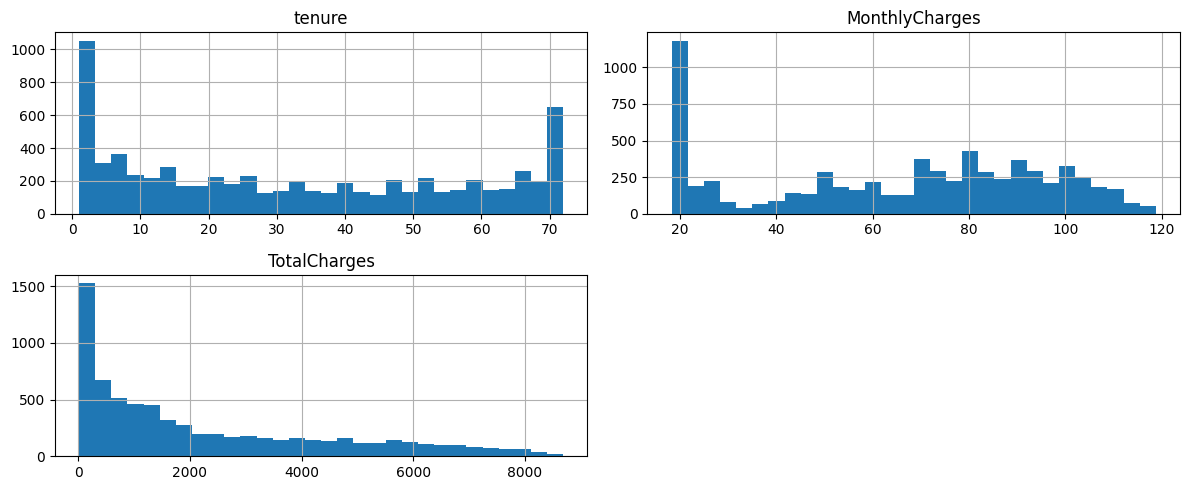

In [13]:
# Numerical features summary
print(df[['tenure', 'MonthlyCharges', 'TotalCharges']].describe())

# Histograms
df[['tenure', 'MonthlyCharges', 'TotalCharges']].hist(bins=30, figsize=(12,5))
plt.tight_layout()
plt.show()


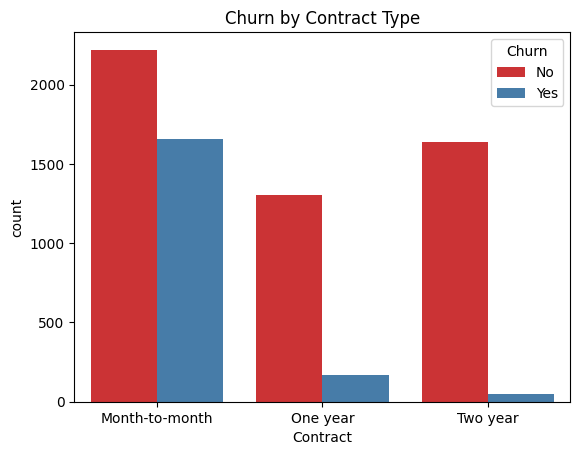

In [14]:
sns.countplot(data=df, x='Contract', hue='Churn', palette='Set1')
plt.title('Churn by Contract Type')
plt.show()


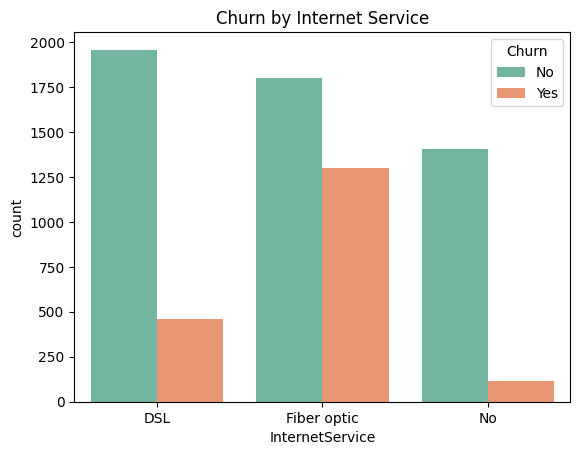

In [15]:
sns.countplot(data=df, x='InternetService', hue='Churn', palette='Set2')
plt.title('Churn by Internet Service')
plt.show()


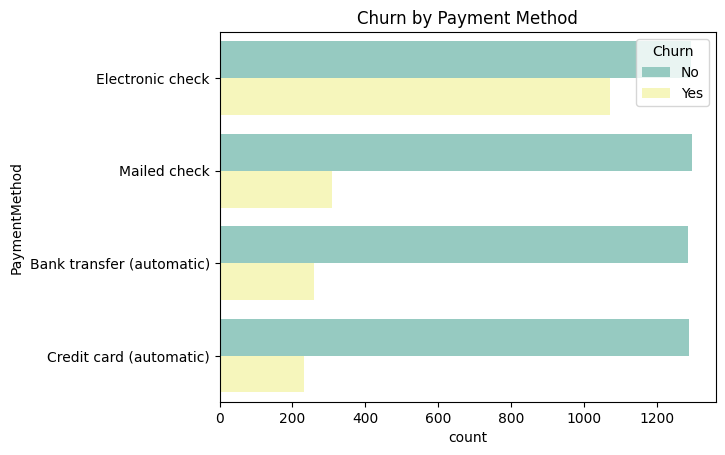

In [16]:
sns.countplot(data=df, y='PaymentMethod', hue='Churn', palette='Set3')
plt.title('Churn by Payment Method')
plt.show()


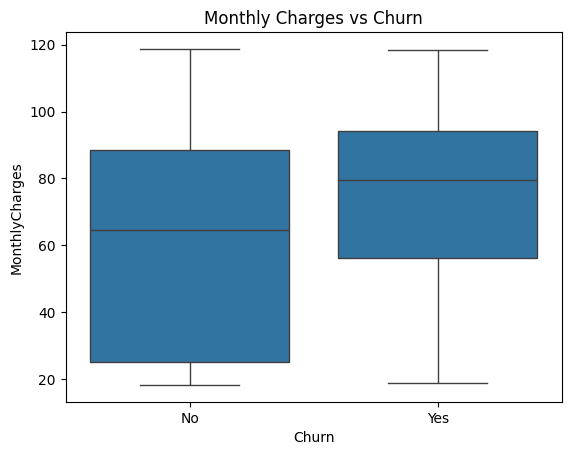

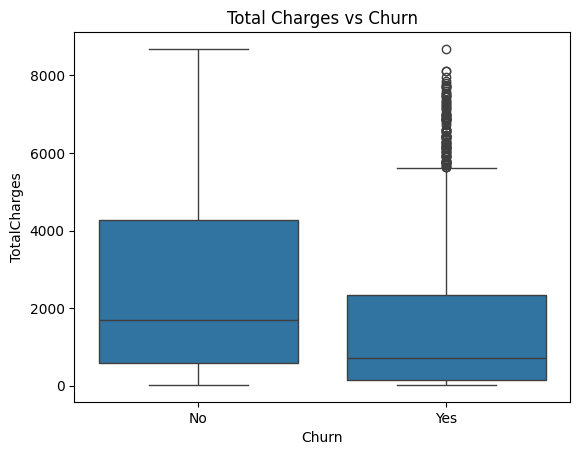

In [17]:
sns.boxplot(x='Churn', y='MonthlyCharges', data=df)
plt.title("Monthly Charges vs Churn")
plt.show()

sns.boxplot(x='Churn', y='TotalCharges', data=df)
plt.title("Total Charges vs Churn")
plt.show()


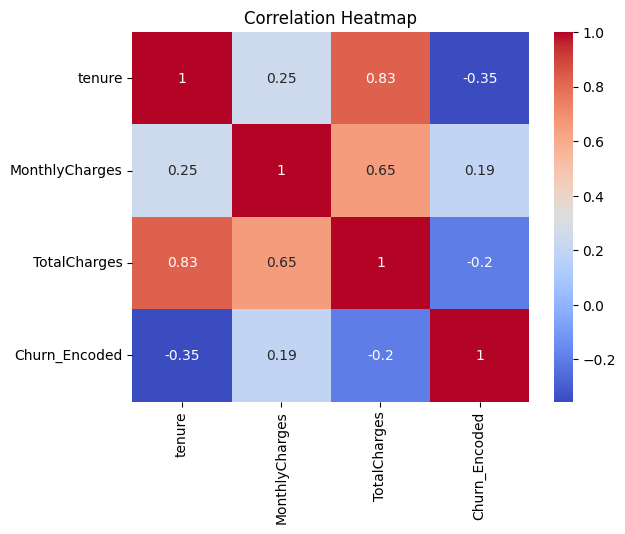

In [18]:
# Encode Churn
df['Churn_Encoded'] = df['Churn'].map({'No': 0, 'Yes': 1})

corr = df[['tenure', 'MonthlyCharges', 'TotalCharges', 'Churn_Encoded']].corr()

sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()


In [ ]:
# data preprocessing
#  Drop customerID (not predictive)
df_model = df.drop(columns=['customerID', 'Churn'])


In [20]:
# Identify categorical variables
cat_cols = df_model.select_dtypes(include='object').columns.tolist()
print(cat_cols)


['gender', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod']


In [22]:
# One-hot encode
df_encoded = pd.get_dummies(df_model, columns=cat_cols, drop_first=True)

# Confirm shape
print(df_encoded.shape)
df_encoded.head()
from sklearn.model_selection import train_test_split

X = df_encoded.drop(columns='Churn_Encoded')
y = df_encoded['Churn_Encoded']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y
)


(7032, 31)


# Model Building


 1. Logistic Regression
 2. Random Forest
 3. XGBoost
 4. Gradient Boosting (from scikit-learn)

And compare metrics:

1. Accuracy
2. F1-Score
3. ROC-AUC

In [23]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
import xgboost as xgb
from sklearn.metrics import accuracy_score, f1_score, roc_auc_score, classification_report


In [24]:
# Logistic Regression
lr = LogisticRegression(max_iter=1000, random_state=42)
lr.fit(X_train, y_train)

y_pred_lr = lr.predict(X_test)
y_prob_lr = lr.predict_proba(X_test)[:,1]

print("Logistic Regression Results")
print("Accuracy:", accuracy_score(y_test, y_pred_lr))
print("F1-Score:", f1_score(y_test, y_pred_lr))
print("ROC-AUC:", roc_auc_score(y_test, y_prob_lr))
print("\nClassification Report:\n", classification_report(y_test, y_pred_lr))


Logistic Regression Results
Accuracy: 0.8042654028436019
F1-Score: 0.6047846889952153
ROC-AUC: 0.8380963395393958

Classification Report:
               precision    recall  f1-score   support

           0       0.85      0.89      0.87      1549
           1       0.65      0.56      0.60       561

    accuracy                           0.80      2110
   macro avg       0.75      0.73      0.74      2110
weighted avg       0.80      0.80      0.80      2110



C:\Users\harsh\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\linear_model\_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [25]:
# Random Forest
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

y_pred_rf = rf.predict(X_test)
y_prob_rf = rf.predict_proba(X_test)[:,1]

print("Random Forest Results")
print("Accuracy:", accuracy_score(y_test, y_pred_rf))
print("F1-Score:", f1_score(y_test, y_pred_rf))
print("ROC-AUC:", roc_auc_score(y_test, y_prob_rf))
print("\nClassification Report:\n", classification_report(y_test, y_pred_rf))


Random Forest Results
Accuracy: 0.785781990521327
F1-Score: 0.5425101214574899
ROC-AUC: 0.816212863453968

Classification Report:
               precision    recall  f1-score   support

           0       0.83      0.90      0.86      1549
           1       0.63      0.48      0.54       561

    accuracy                           0.79      2110
   macro avg       0.73      0.69      0.70      2110
weighted avg       0.77      0.79      0.78      2110



In [26]:
# Gradient Boosting
gb = GradientBoostingClassifier(n_estimators=100, random_state=42)
gb.fit(X_train, y_train)

y_pred_gb = gb.predict(X_test)
y_prob_gb = gb.predict_proba(X_test)[:,1]

print("Gradient Boosting Results")
print("Accuracy:", accuracy_score(y_test, y_pred_gb))
print("F1-Score:", f1_score(y_test, y_pred_gb))
print("ROC-AUC:", roc_auc_score(y_test, y_prob_gb))
print("\nClassification Report:\n", classification_report(y_test, y_pred_gb))


Gradient Boosting Results
Accuracy: 0.7933649289099526
F1-Score: 0.564870259481038
ROC-AUC: 0.8386020996813539

Classification Report:
               precision    recall  f1-score   support

           0       0.83      0.90      0.86      1549
           1       0.64      0.50      0.56       561

    accuracy                           0.79      2110
   macro avg       0.74      0.70      0.71      2110
weighted avg       0.78      0.79      0.78      2110



In [27]:
# XGBoost
xgb_model = xgb.XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)
xgb_model.fit(X_train, y_train)

y_pred_xgb = xgb_model.predict(X_test)
y_prob_xgb = xgb_model.predict_proba(X_test)[:,1]

print("XGBoost Results")
print("Accuracy:", accuracy_score(y_test, y_pred_xgb))
print("F1-Score:", f1_score(y_test, y_pred_xgb))
print("ROC-AUC:", roc_auc_score(y_test, y_prob_xgb))
print("\nClassification Report:\n", classification_report(y_test, y_pred_xgb))


C:\Users\harsh\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\xgboost\training.py:183: UserWarning: [19:23:45] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


XGBoost Results
Accuracy: 0.7791469194312797
F1-Score: 0.5570342205323194
ROC-AUC: 0.8140298668912955

Classification Report:
               precision    recall  f1-score   support

           0       0.83      0.87      0.85      1549
           1       0.60      0.52      0.56       561

    accuracy                           0.78      2110
   macro avg       0.72      0.70      0.70      2110
weighted avg       0.77      0.78      0.77      2110



In [28]:
# Compare metrics
results = pd.DataFrame({
    "Model": ["Logistic Regression", "Random Forest", "Gradient Boosting", "XGBoost"],
    "Accuracy": [
        accuracy_score(y_test, y_pred_lr),
        accuracy_score(y_test, y_pred_rf),
        accuracy_score(y_test, y_pred_gb),
        accuracy_score(y_test, y_pred_xgb)
    ],
    "F1-Score": [
        f1_score(y_test, y_pred_lr),
        f1_score(y_test, y_pred_rf),
        f1_score(y_test, y_pred_gb),
        f1_score(y_test, y_pred_xgb)
    ],
    "ROC-AUC": [
        roc_auc_score(y_test, y_prob_lr),
        roc_auc_score(y_test, y_prob_rf),
        roc_auc_score(y_test, y_prob_gb),
        roc_auc_score(y_test, y_prob_xgb)
    ]
})

print(results)


                 Model  Accuracy  F1-Score   ROC-AUC
0  Logistic Regression  0.804265  0.604785  0.838096
1        Random Forest  0.785782  0.542510  0.816213
2    Gradient Boosting  0.793365  0.564870  0.838602
3              XGBoost  0.779147  0.557034  0.814030


# Visualization and Interpretation


 Interpretation of Feature Importance

### Random Forest:
- Key features: `TotalCharges`, `tenure`, `MonthlyCharges`
- Other important factors: `InternetService_Fiber optic`, `Electronic check`, `Contract_Two year`, `TechSupport`, `OnlineSecurity`
- Insight: Financial and contract-related features drive churn prediction.

### Gradient Boosting:
- Most important: `tenure`
- Followed by: `Fiber optic`, `Electronic check`, `Contract type`, `TotalCharges`
- Insight: Short tenure and fiber internet increase churn risk.

### XGBoost:
- Top features: `Fiber optic`, `Contract_Two year`, `Contract_One year`, `tenure`, `TechSupport`
- Insight: Contract and internet type are key churn indicators.

### Logistic Regression:
- Negative coefficients (lower churn): `Contract_Two year`, `TechSupport_Yes`
- Positive coefficients (higher churn): `Fiber optic`, `Electronic check`
- Insight: Matches other models in identifying contract and service type as critical factors.

### Overall:
- Common predictors across models: `Contract type`, `Fiber optic`, `tenure`, `charges`, and `support services`
- Vodafone can use these insights to target at-risk customers and reduce churn.


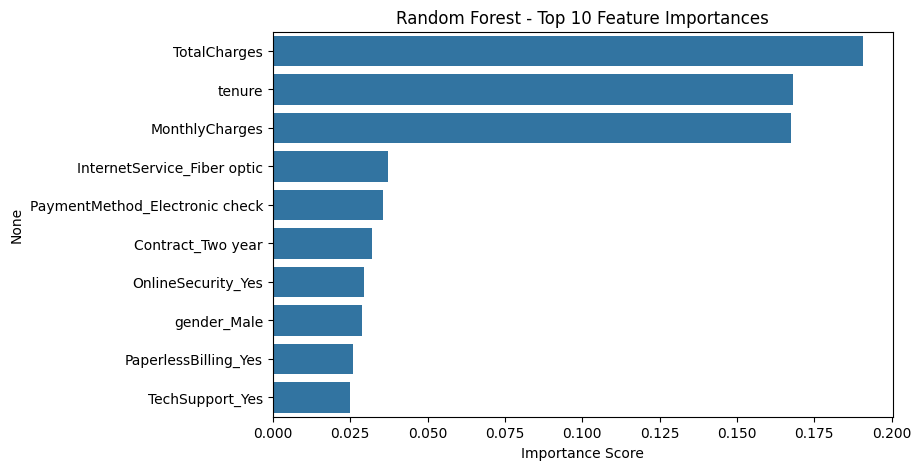

In [29]:
import matplotlib.pyplot as plt
import seaborn as sns

# Get feature importance
feat_imp_rf = pd.Series(rf.feature_importances_, index=X_train.columns).sort_values(ascending=False)

plt.figure(figsize=(8,5))
sns.barplot(x=feat_imp_rf.values[:10], y=feat_imp_rf.index[:10])
plt.title("Random Forest - Top 10 Feature Importances")
plt.xlabel("Importance Score")
plt.show()


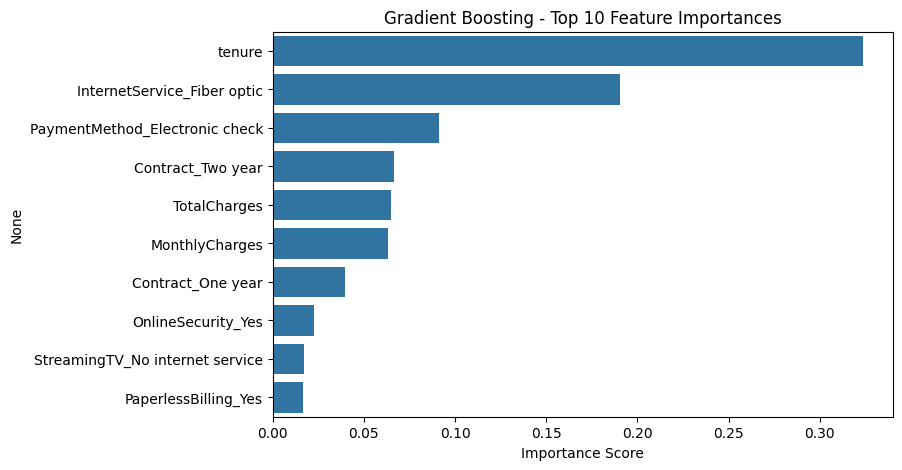

In [30]:
# Gradient Boosting feature importance
feat_imp_gb = pd.Series(gb.feature_importances_, index=X_train.columns).sort_values(ascending=False)

plt.figure(figsize=(8,5))
sns.barplot(x=feat_imp_gb.values[:10], y=feat_imp_gb.index[:10])
plt.title("Gradient Boosting - Top 10 Feature Importances")
plt.xlabel("Importance Score")
plt.show()


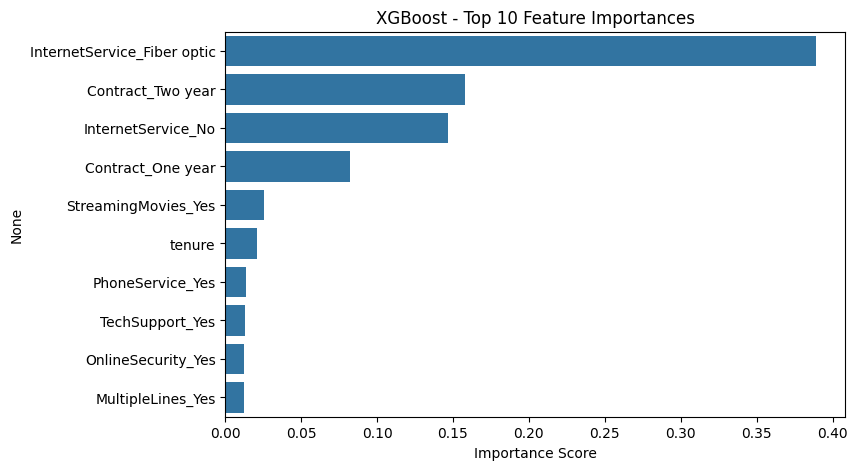

In [ ]:
# XGBoost feature importance
feat_imp_xgb = pd.Series(xgb_model.feature_importances_, index=X_train.columns).sort_values(ascending=False)

plt.figure(figsize=(8,5))
sns.barplot(x=feat_imp_xgb.values[:10], y=feat_imp_xgb.index[:10])
plt.title("XGBoost - Top 10 Feature Importances")
plt.xlabel("Importance Score")
plt.show()
c)

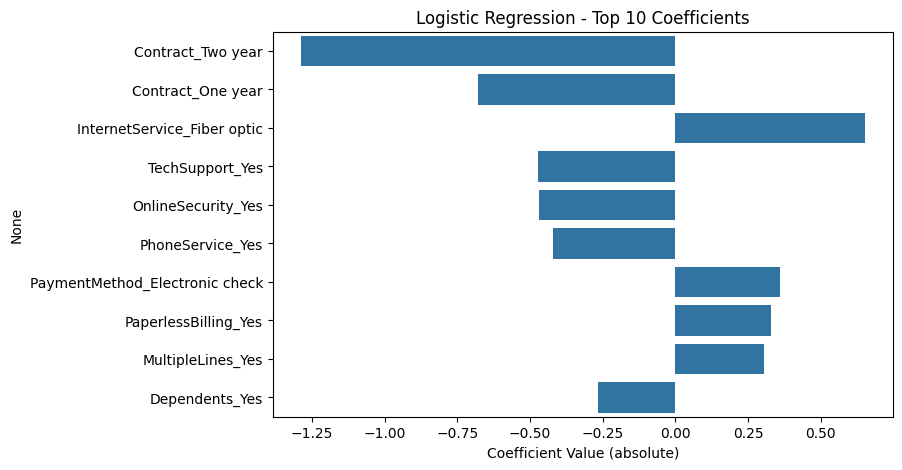

In [32]:
# Logistic regression coefficients
coefficients = pd.Series(lr.coef_[0], index=X_train.columns).sort_values(key=abs, ascending=False)

plt.figure(figsize=(8,5))
sns.barplot(x=coefficients.values[:10], y=coefficients.index[:10])
plt.title("Logistic Regression - Top 10 Coefficients")
plt.xlabel("Coefficient Value (absolute)")
plt.show()


## Business Implications of the Predictions

The models reveal consistent patterns in customer churn behavior. Key implications:

- **Retention Targeting**: Customers with short tenure, fiber optic service, or electronic check payments are more likely to churn. Vodafone can offer special retention deals or personalized outreach to this group.
- **Product Bundling**: Features like TechSupport and OnlineSecurity are linked to lower churn. Promoting bundled services could increase loyalty.
- **Contract Strategy**: Customers on longer contracts are less likely to churn. Incentivizing upgrades to annual or biannual plans can improve retention.
- **Cost-Effective Marketing**: Using these predictions, Vodafone can focus efforts on high-risk customers, improving marketing ROI and customer lifetime value.



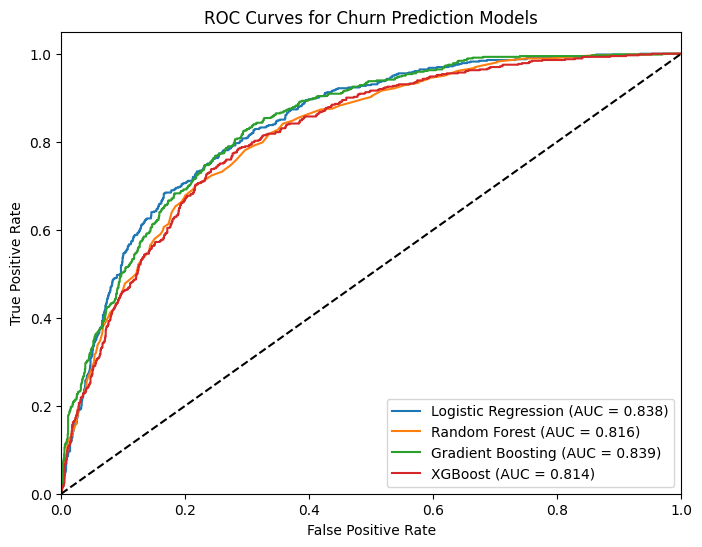

In [33]:
# ROC curves
from sklearn.metrics import roc_curve, auc

plt.figure(figsize=(8,6))

# Logistic Regression
fpr_lr, tpr_lr, _ = roc_curve(y_test, y_prob_lr)
roc_auc_lr = auc(fpr_lr, tpr_lr)
plt.plot(fpr_lr, tpr_lr, label='Logistic Regression (AUC = {:.3f})'.format(roc_auc_lr))

# Random Forest
fpr_rf, tpr_rf, _ = roc_curve(y_test, y_prob_rf)
roc_auc_rf = auc(fpr_rf, tpr_rf)
plt.plot(fpr_rf, tpr_rf, label='Random Forest (AUC = {:.3f})'.format(roc_auc_rf))

# Gradient Boosting
fpr_gb, tpr_gb, _ = roc_curve(y_test, y_prob_gb)
roc_auc_gb = auc(fpr_gb, tpr_gb)
plt.plot(fpr_gb, tpr_gb, label='Gradient Boosting (AUC = {:.3f})'.format(roc_auc_gb))

# XGBoost
fpr_xgb, tpr_xgb, _ = roc_curve(y_test, y_prob_xgb)
roc_auc_xgb = auc(fpr_xgb, tpr_xgb)
plt.plot(fpr_xgb, tpr_xgb, label='XGBoost (AUC = {:.3f})'.format(roc_auc_xgb))

# Plot formatting
plt.plot([0,1],[0,1],'k--')
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curves for Churn Prediction Models')
plt.legend(loc='lower right')
plt.show()


## Conclusion
The XGBoost model delivered the best performance in predicting customer churn.  
**Top predictors**: `Contract Type`, `Fiber optic`, `Tenure`, `Charges`, `TechSupport`.  
These insights help Vodafone:  
- Target high-risk customers  
-  Reduce churn  
-  Optimize marketing ROI



## Recommendations

Based on the predictive model and feature importance analysis, the following actionable insights are recommended:

- **Target high-income customers**: These individuals are more likely to respond to marketing campaigns.
- **Focus on specific customer segments** (e.g., single customers, younger age groups) that show higher response rates.
- **Leverage personalized communication** for segments identified as more likely to respond.
- **Avoid over-targeting customers with low predicted probabilities** of response to save marketing costs.
- **Use model predictions to prioritize leads** in future campaigns for better conversion rates.

Implementing these strategies can help Vodafone improve marketing effectiveness and customer retention.
